In [1]:
import numpy as np
import bpy
from bpy import context, data, ops
from stl import mesh
import cv2 as cv
from PIL import Image
from PIL import ImageFilter
import matplotlib.pyplot as plt

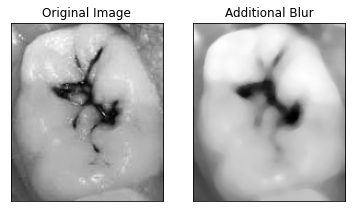

(164, 140)

In [2]:
img = cv.imread("teeth_dataset/teeth_dataset/Training/caries/wc32.jpg",0) #'Downloads/dental-office-diagram-realistic-teeth-obj/test2.png'
scale_percent = 100 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
mask = cv.threshold(img, 220, 255, cv.THRESH_BINARY)[1]
result = cv.inpaint(img, mask, 21, cv.INPAINT_TELEA)
gray_img = cv.medianBlur(result,9)
resized = cv.resize(gray_img, dim, interpolation = cv.INTER_AREA)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(resized,cmap = 'gray')
plt.title('Additional Blur'), plt.xticks([]), plt.yticks([])
plt.show()
imageNp = np.array(resized)
imageNp.shape

In [3]:
img = cv.imread("teeth_dataset/teeth_dataset/Training/caries/wc32.jpg", cv.IMREAD_GRAYSCALE) #/Training/without_caries/nc20.jpg
scale_percent = 15 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

mask = cv.threshold(img, 220, 255, cv.THRESH_BINARY)[1]
result = cv.inpaint(img, mask, 21, cv.INPAINT_TELEA)
gray_img = cv.medianBlur(result,9)
gray_img = cv.resize(gray_img, dim, interpolation = cv.INTER_AREA)

max_height= gray_img.shape[0]/1.618
min_height=0

imageNp = np.array(gray_img)
maxPix=imageNp.max()
minPix=imageNp.min()

print(imageNp)
(nrows,ncols)=gray_img.shape

vertices=np.zeros((nrows,ncols,3))

for x in range(0, nrows):
    for y in range(0, ncols):
        pixelIntensity = imageNp[x][y]
        z = ((pixelIntensity) * max_height) / maxPix
        vertices[x][y]=(x, y, z)

faces=[]
for x in range(0, nrows - 1):
    for y in range(0, ncols - 1):
        vertice1 = vertices[x][y]
        vertice2 = vertices[x+1][y]
        vertice3 = vertices[x+1][y+1]
        vertice4 = vertices[x][y+1]
    
        face1 = np.array([vertice1,vertice2,vertice3])
        face2 = np.array([vertice1,vertice4,vertice3])

        faces.append(face1)
        faces.append(face2)

print(f"number of faces: {len(faces)}")
facesNp = np.array(faces)
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]
        
stl_in = 'tooth_3D_modelRight.stl'
surface.save(stl_in)
tooth = bpy.ops.import_mesh.stl(filepath=stl_in)
print(surface)

[[151 140 142 146 156 142 122 120 122 154 187 187 166 115  82 109 109 118
  140 150 161]
 [180 140 136 138 168 190 199 204 202 203 206 205 195 173 138 114 111 120
  141 134 134]
 [183 142 137 191 210 208 207 209 206 203 207 207 193 186 186 170 139 129
  140 136 139]
 [155 138 188 213 211 209 208 210 200 199 203 195 170 189 198 195 179 141
  134 140 144]
 [140 144 203 209 208 208 208 205 191 189 190 149 161 190 202 205 195 163
  142 149 153]
 [123 151 206 210 209 210 207 201 181 159 159 122 173 194 206 209 205 190
  149 151 156]
 [120 158 204 207 206 209 204 198 180 149 128 155 182 203 210 211 209 203
  174 152 155]
 [115 146 193 198 195 198 194 181 167 125  91 151 192 205 211 212 211 206
  191 154 144]
 [112 132 172 180 177 158 119  83  65  47  44 128 187 199 204 206 210 207
  198 172 141]
 [109 136 167 175 171 148  57  32  66  71  42 111 172 185 188 191 203 203
  198 185 143]
 [110 152 169 172 170 169 150 111 114 112  49  70 138 147 140 169 192 196
  193 184 144]
 [112 157 172 174 174

In [1]:
#ob = context.view_layer.objects.active
#ob

NameError: name 'context' is not defined

In [43]:
imgR0 = cv.imread("teeth_dataset/teeth_dataset/dental-office-diagram-realistic-teeth-obj/test3right.png", cv.IMREAD_GRAYSCALE)
scale_percent = 10 # percent of original size
width = int(imgR0.shape[1] * scale_percent / 100)
height = int(imgR0.shape[0] * scale_percent / 100)
dim = (width, height)
imgR0 = cv.resize(imgR0, dim, interpolation = cv.INTER_AREA)
imageNp0 = np.array(imgR0)
imageNp0.shape
imageNp0

array([[ 73,  71,  72, ...,  71,  72,  72],
       [ 73,  71,  72, ...,  71,  72,  72],
       [ 73,  71,  72, ...,  71,  72,  72],
       ...,
       [163, 164, 164, ..., 173, 174, 175],
       [162, 163, 164, ..., 173, 173, 174],
       [161, 162, 163, ..., 172, 173, 173]], dtype=uint8)

In [44]:
imgR1 = cv.imread("teeth_dataset/teeth_dataset/dental-office-diagram-realistic-teeth-obj/r1.png", cv.IMREAD_GRAYSCALE)
imgR1 = cv.resize(imgR1, dim, interpolation = cv.INTER_AREA)
imageNp1 = np.array(imgR1)
imageNp1.shape[0]

26

In [45]:
dif1 = np.zeros(imageNp0.shape)
for i in range(imageNp0.shape[0]):
    for j in range(imageNp0.shape[1]):
        if imageNp0[i][j] > imageNp1[i][j]:
            dif1[i][j] = imageNp0[i][j] - imageNp1[i][j]
        else:
            dif1[i][j] = imageNp1[i][j] - imageNp0[i][j]
np.mean(dif1)
dif = np.mean(dif1)

In [46]:
imgR2 = cv.imread("teeth_dataset/teeth_dataset/dental-office-diagram-realistic-teeth-obj/r2.png", cv.IMREAD_GRAYSCALE)
imgR2 = cv.resize(imgR2, dim, interpolation = cv.INTER_AREA)
imageNp2 = np.array(imgR2)

dif2 = np.zeros(imageNp0.shape)
for i in range(imageNp0.shape[0]):
    for j in range(imageNp0.shape[1]):
        if imageNp0[i][j] > imageNp2[i][j]:
            dif2[i][j] = imageNp0[i][j] - imageNp2[i][j]
        else:
            dif2[i][j] = imageNp2[i][j] - imageNp0[i][j]
dif = np.append(dif, np.mean(dif2))

In [47]:
imgR3 = cv.imread("teeth_dataset/teeth_dataset/dental-office-diagram-realistic-teeth-obj/r3.png", cv.IMREAD_GRAYSCALE)
imgR3 = cv.resize(imgR3, dim, interpolation = cv.INTER_AREA)
imageNp3 = np.array(imgR3)

dif3 = np.zeros(imageNp0.shape)
for i in range(imageNp0.shape[0]):
    for j in range(imageNp0.shape[1]):
        if imageNp0[i][j] > imageNp3[i][j]:
            dif3[i][j] = imageNp0[i][j] - imageNp3[i][j]
        else:
            dif3[i][j] = imageNp3[i][j] - imageNp0[i][j]
dif = np.append(dif, np.mean(dif3))

In [48]:
imgR4 = cv.imread("teeth_dataset/teeth_dataset/dental-office-diagram-realistic-teeth-obj/r4.png", cv.IMREAD_GRAYSCALE)
imgR4 = cv.resize(imgR4, dim, interpolation = cv.INTER_AREA)
imageNp4 = np.array(imgR4)

dif4 = np.zeros(imageNp0.shape)
for i in range(imageNp0.shape[0]):
    for j in range(imageNp0.shape[1]):
        if imageNp0[i][j] > imageNp4[i][j]:
            dif4[i][j] = imageNp0[i][j] - imageNp4[i][j]
        else:
            dif4[i][j] = imageNp4[i][j] - imageNp0[i][j]
dif = np.append(dif, np.mean(dif4))

In [49]:
imgR5 = cv.imread("teeth_dataset/teeth_dataset/dental-office-diagram-realistic-teeth-obj/r5.png", cv.IMREAD_GRAYSCALE)
imgR5 = cv.resize(imgR5, dim, interpolation = cv.INTER_AREA)
imageNp5 = np.array(imgR5)

dif5 = np.zeros(imageNp0.shape)
for i in range(imageNp0.shape[0]):
    for j in range(imageNp0.shape[1]):
        if imageNp0[i][j] > imageNp5[i][j]:
            dif5[i][j] = imageNp0[i][j] - imageNp5[i][j]
        else:
            dif5[i][j] = imageNp5[i][j] - imageNp0[i][j]
dif = np.append(dif, np.mean(dif5))

In [50]:
imgR6 = cv.imread("teeth_dataset/teeth_dataset/dental-office-diagram-realistic-teeth-obj/r6.png", cv.IMREAD_GRAYSCALE)
imgR6 = cv.resize(imgR6, dim, interpolation = cv.INTER_AREA)
imageNp6 = np.array(imgR6)

dif6 = np.zeros(imageNp0.shape)
for i in range(imageNp0.shape[0]):
    for j in range(imageNp0.shape[1]):
        if imageNp0[i][j] > imageNp6[i][j]:
            dif6[i][j] = imageNp0[i][j] - imageNp6[i][j]
        else:
            dif6[i][j] = imageNp6[i][j] - imageNp0[i][j]
dif = np.append(dif, np.mean(dif6))

In [51]:
imgR7 = cv.imread("teeth_dataset/teeth_dataset/dental-office-diagram-realistic-teeth-obj/r7.png", cv.IMREAD_GRAYSCALE)
imgR7 = cv.resize(imgR7, dim, interpolation = cv.INTER_AREA)
imageNp7 = np.array(imgR7)

dif7 = np.zeros(imageNp0.shape)
for i in range(imageNp0.shape[0]):
    for j in range(imageNp0.shape[1]):
        if imageNp0[i][j] > imageNp7[i][j]:
            dif7[i][j] = imageNp0[i][j] - imageNp7[i][j]
        else:
            dif7[i][j] = imageNp7[i][j] - imageNp0[i][j]
dif = np.append(dif, np.mean(dif7))

In [52]:
imgR8 = cv.imread("teeth_dataset/teeth_dataset/dental-office-diagram-realistic-teeth-obj/r8.png", cv.IMREAD_GRAYSCALE)
imgR8 = cv.resize(imgR8, dim, interpolation = cv.INTER_AREA)
imageNp8 = np.array(imgR8)

dif8 = np.zeros(imageNp0.shape)
for i in range(imageNp0.shape[0]):
    for j in range(imageNp0.shape[1]):
        if imageNp0[i][j] > imageNp8[i][j]:
            dif8[i][j] = imageNp0[i][j] - imageNp8[i][j]
        else:
            dif8[i][j] = imageNp8[i][j] - imageNp0[i][j]
dif = np.append(dif, np.mean(dif8))

In [53]:
imgR9 = cv.imread("teeth_dataset/teeth_dataset/dental-office-diagram-realistic-teeth-obj/r9.png", cv.IMREAD_GRAYSCALE)
imgR9 = cv.resize(imgR9, dim, interpolation = cv.INTER_AREA)
imageNp9 = np.array(imgR9)

dif9 = np.zeros(imageNp0.shape)
for i in range(imageNp0.shape[0]):
    for j in range(imageNp0.shape[1]):
        if imageNp0[i][j] > imageNp9[i][j]:
            dif9[i][j] = imageNp0[i][j] - imageNp9[i][j]
        else:
            dif9[i][j] = imageNp9[i][j] - imageNp0[i][j]
dif = np.append(dif, np.mean(dif9))

In [54]:
imgR10 = cv.imread("teeth_dataset/teeth_dataset/dental-office-diagram-realistic-teeth-obj/r10.png", cv.IMREAD_GRAYSCALE)
imgR10 = cv.resize(imgR10, dim, interpolation = cv.INTER_AREA)
imageNp10 = np.array(imgR10)

dif10 = np.zeros(imageNp0.shape)
for i in range(imageNp0.shape[0]):
    for j in range(imageNp0.shape[1]):
        if imageNp0[i][j] > imageNp10[i][j]:
            dif10[i][j] = imageNp0[i][j] - imageNp10[i][j]
        else:
            dif10[i][j] = imageNp10[i][j] - imageNp0[i][j]
dif = np.append(dif, np.mean(dif10))

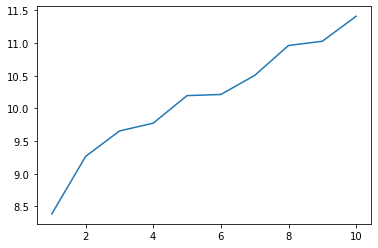

In [55]:
plt.plot(np.arange(1,11), dif)